64
64


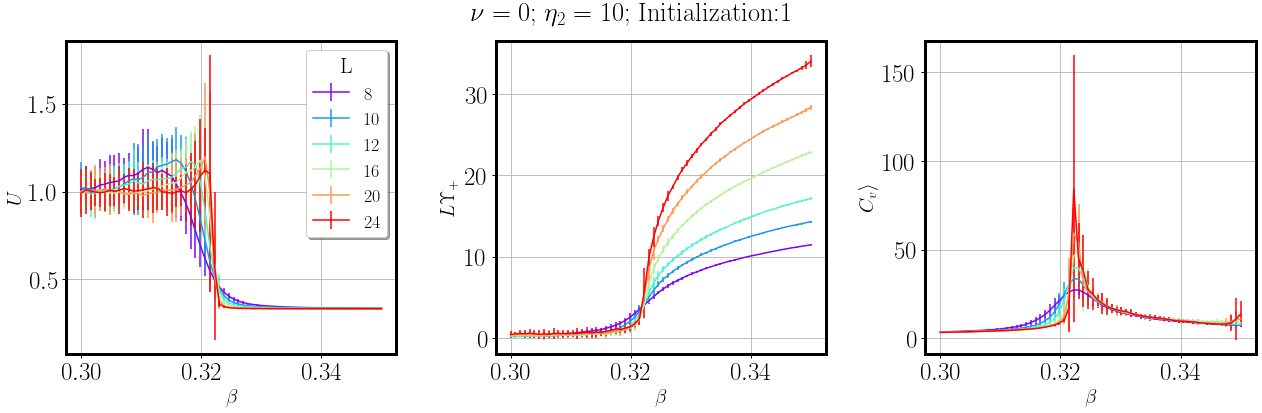

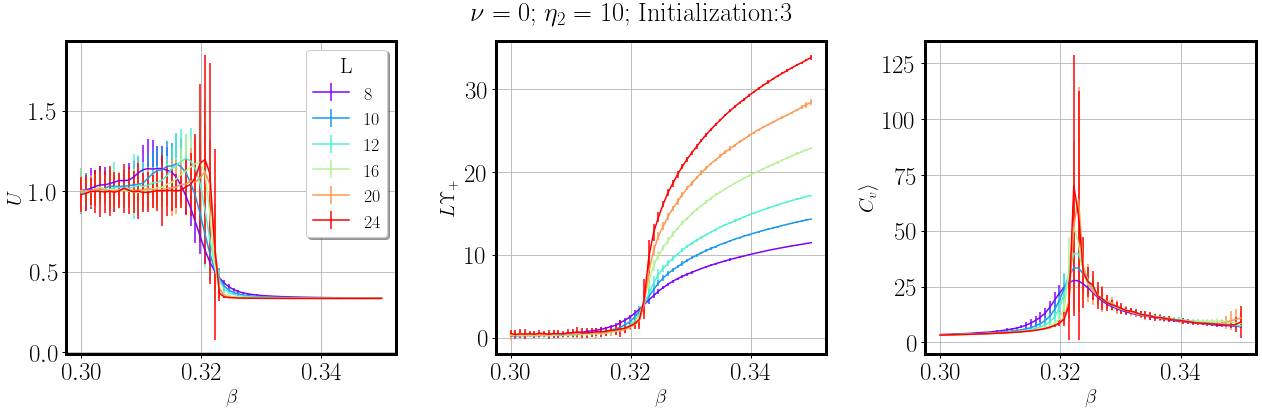

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import sys
import os
import math
from statsmodels.graphics.tsaplots import plot_acf
import statsmodels.api as sm
from statsmodels.tsa.stattools import acf
import scipy.integrate as integrate
import random
from scipy.optimize import fsolve
from scipy.optimize import bisect
from scipy.optimize import curve_fit

plt.rc('text',usetex=True)
plt.rc('text.latex', preamble=r'\usepackage{bm}')
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.serif'] = 'Computer Modern'
plt.rcParams['axes.linewidth']  = 3.0
plt.rcParams['axes.labelsize']  = 20
plt.rcParams.update({'font.size': 22})
plt.rcParams['xtick.labelsize'] = 25
plt.rcParams['ytick.labelsize'] = 25
plt.rcParams['xtick.major.size'] = 4
plt.rcParams['ytick.major.size'] = 4
plt.rcParams['xtick.minor.size'] = 3
plt.rcParams['ytick.minor.size'] = 3
plt.rcParams['legend.fontsize']  = 22
plt.rcParams['legend.frameon']  = True
plt.rcParams["legend.fancybox"] = True
plt.rcParams["legend.shadow"] = True
plt.rcParams["legend.framealpha"] = 1
plt.rcParams["axes.facecolor"] = 'white'
plt.rcParams["axes.edgecolor"] = 'black'

plt.rcParams['figure.figsize'] = 8, 8

plt.rcParams['xtick.major.width'] = 1
plt.rcParams['ytick.major.width'] = 1
plt.rcParams['xtick.minor.width'] = 0
plt.rcParams['ytick.minor.width'] = 0
bbox_props = dict(boxstyle="round", fc="w", ec="0.5", alpha=0.9)



e=0
nu=0
h=1
rho=1
alpha=1
eta1=0
eta2=10
blow=0.3
bhigh=0.35
Hinit_3=3
Hinit_1=1
nMAX=30

LLIST=[8, 10, 12, 16, 20, 24]#, 32 ]

BASEDIR=("/home/ilaria/Desktop/MultiComponent_VillainModel/Output_Villain_2C/Model_Sym/e_%s/nu_%s/eta2_%s/h_%s" %(e, nu, eta2,  h))
folder_fig=("/home/ilaria/Desktop/MultiComponent_VillainModel/Output_Villain_2C/Model_Sym/Figures_new")

fig1, ax1 = plt.subplots(nrows=1, ncols=3, sharex=True, figsize=(18,6))
fig1.suptitle(r"$\nu=%s$; $\eta_2=%s$; Initialization:%s" %(nu, eta2, Hinit_1))
ax1[0].set_xlabel(r"$\beta$")
ax1[1].set_xlabel(r"$\beta$")
ax1[2].set_xlabel(r"$\beta$")
ax1[0].set_ylabel(r"$ U $")
ax1[1].set_ylabel(r"$ L\Upsilon_{+} $")
ax1[2].set_ylabel(r"$C_v \rangle$")

ax1[0].grid()
ax1[1].grid()
ax1[2].grid()


fig3, ax3 = plt.subplots(nrows=1, ncols=3, sharex=True, figsize=(18,6))
fig3.suptitle(r"$\nu=%s$; $\eta_2=%s$; Initialization:%s" %(nu, eta2, Hinit_3))
ax3[0].set_xlabel(r"$\beta$")
ax3[1].set_xlabel(r"$\beta$")
ax3[2].set_xlabel(r"$\beta$")
#ax1[3].set_xlabel(r"$\beta$")
ax3[0].set_ylabel(r"$ U $")
ax3[1].set_ylabel(r"$ L\Upsilon_{+} $")
#ax1[2].set_ylabel(r" L\Upsilon_{-} $")
ax3[2].set_ylabel(r"$C_v \rangle$")

ax3[0].grid()
ax3[1].grid()
ax3[2].grid()


color=iter(plt.cm.rainbow(np.linspace(0,1,len(LLIST))))
for L in LLIST:
    c_m=next(color)

    HOMEDIR_1=("%s/L%s_rho%s_alpha%s_eta1%s_eta2%s_e%s_h%s_nu%s_bmin%s_bmax%s_nMAX%s_init%s" 
             %(BASEDIR, L, rho, alpha, eta1, eta2, e, h, nu, blow, bhigh, nMAX, Hinit_1))
       
    data_U=np.loadtxt("%s/Binder_cumulant.txt" %HOMEDIR_1)
    beta= data_U[0]
    U= data_U[1]
    err_U= data_U[2]

    data_M=np.loadtxt("%s/Magnetization.txt" %HOMEDIR_1)
    beta= data_M[0]
    M= data_M[1]
    err_M= data_M[2]

    beta, J_sum, err_J_sum=np.loadtxt("%s/Helicity_modulus_sum.txt" %HOMEDIR_1,  usecols=(0,1,2), unpack=True )
    beta, J_diff, err_J_diff=np.loadtxt("%s/Helicity_modulus_diff.txt" %HOMEDIR_1,  usecols=(0,1,2), unpack=True )

    
    data_Cv=np.loadtxt("%s/Specific_Heat.txt" %HOMEDIR_1)
    beta= data_Cv[0]
    Cv= data_Cv[1]
    err_Cv= data_Cv[2]    
    
    ax1[0].errorbar(beta, U, yerr=err_U, fmt="-", c=c_m, label="%s" %L)
    ax1[1].errorbar(beta, L*J_sum, yerr=L*err_J_sum, fmt= "-", c=c_m, label="%s" %L)
    ax1[2].errorbar(beta, Cv, yerr=err_Cv, fmt= "-", c=c_m, label="%s" %L)

    HOMEDIR_3=("%s/L%s_rho%s_alpha%s_eta1%s_eta2%s_e%s_h%s_nu%s_bmin%s_bmax%s_nMAX%s_init%s" 
             %(BASEDIR, L, rho, alpha, eta1, eta2, e, h, nu, blow, bhigh, nMAX, Hinit_3))
       
    data_U=np.loadtxt("%s/Binder_cumulant.txt" %HOMEDIR_3)
    beta= data_U[0]
    U= data_U[1]
    err_U= data_U[2]

    data_M=np.loadtxt("%s/Magnetization.txt" %HOMEDIR_3)
    beta= data_M[0]
    M= data_M[1]
    err_M= data_M[2]

    beta, J_sum, err_J_sum=np.loadtxt("%s/Helicity_modulus_sum.txt" %HOMEDIR_3,  usecols=(0,1,2), unpack=True )
    beta, J_diff, err_J_diff=np.loadtxt("%s/Helicity_modulus_diff.txt" %HOMEDIR_3,  usecols=(0,1,2), unpack=True )

    
    data_Cv=np.loadtxt("%s/Specific_Heat.txt" %HOMEDIR_3)
    beta= data_Cv[0]
    Cv= data_Cv[1]
    err_Cv= data_Cv[2]    
    
    ax3[0].errorbar(beta, U, yerr=err_U, fmt="-", c=c_m, label="%s" %L)
    ax3[1].errorbar(beta, L*J_sum, yerr=L*err_J_sum, fmt= "-", c=c_m, label="%s" %L)
    ax3[2].errorbar(beta, Cv, yerr=err_Cv, fmt= "-", c=c_m, label="%s" %L)    
    
# ax1[1].set_ylim((-0.5,5))
ax1[0].legend(loc="best", title="L", fontsize=18)
fig1.tight_layout()
fig1.subplots_adjust(wspace=0.3, top=0.9)
print(len(beta))
fig1.savefig("%s/New_e%s_nu%s_eta1%s_eta2%s_bmin%s_bmax%s.png" %(folder_fig, e, nu, eta1, eta2, blow, bhigh) )

ax3[0].legend(loc="best", title="L", fontsize=18)
fig3.tight_layout()
fig3.subplots_adjust(wspace=0.3, top=0.9)
print(len(beta))
fig3.savefig("%s/New_e%s_nu%s_eta1%s_eta2%s_bmin%s_bmax%s.png" %(folder_fig, e, nu, eta1, eta2, blow, bhigh) )

64
64
64


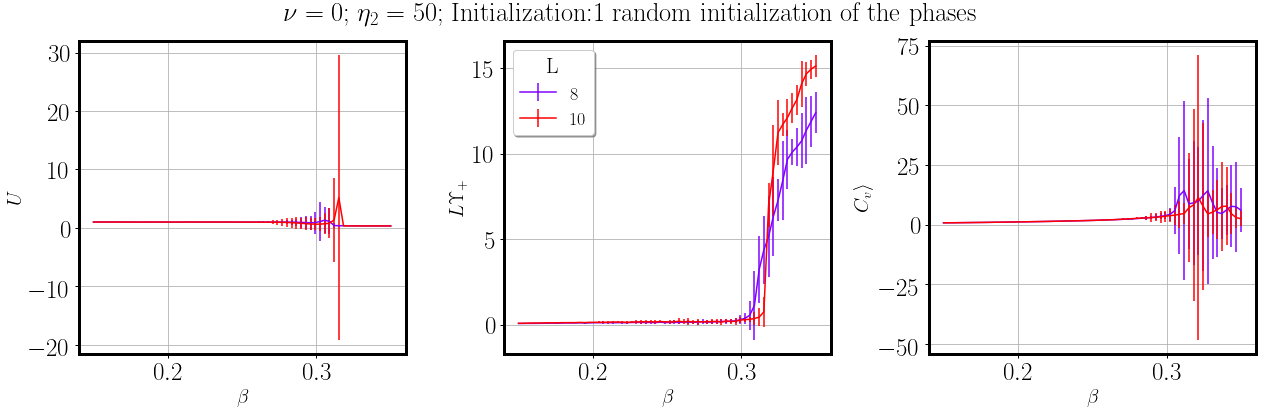

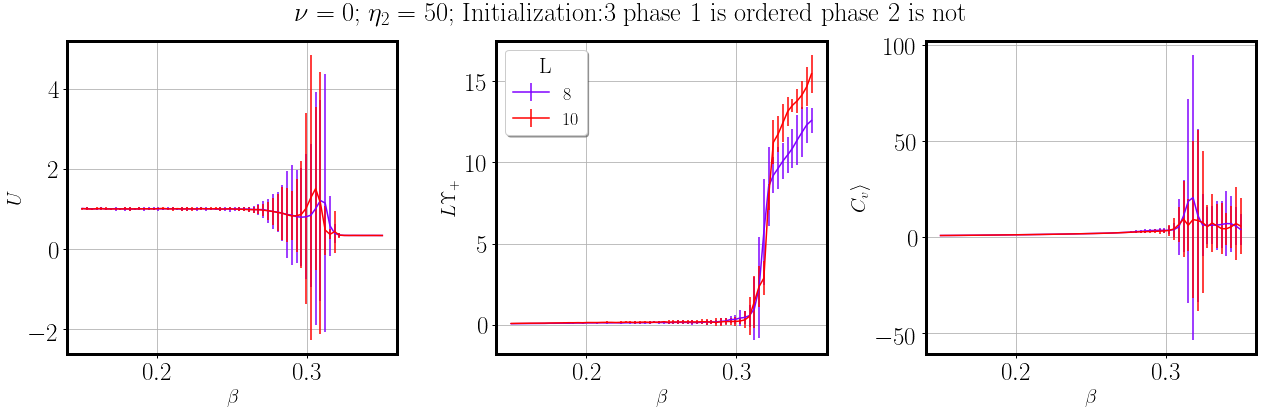

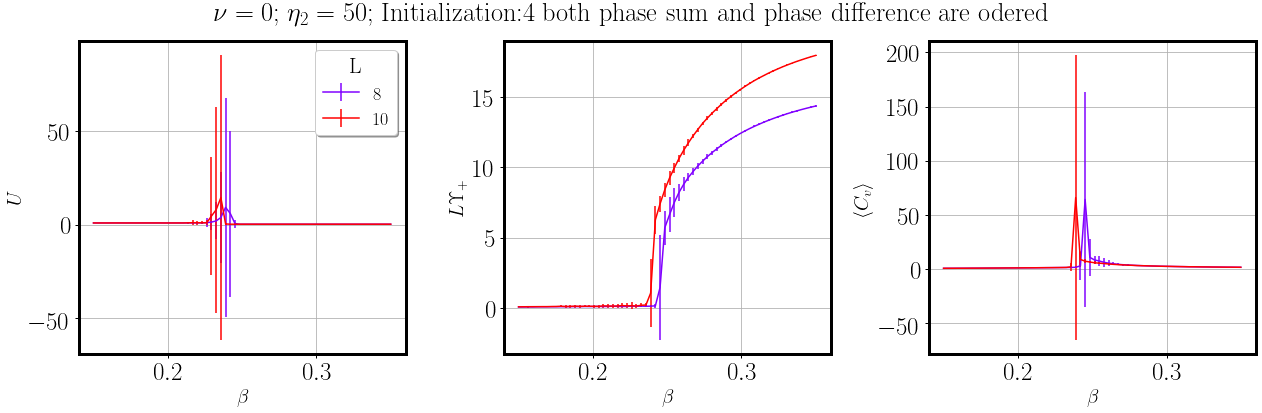

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import sys
import os
import math
from statsmodels.graphics.tsaplots import plot_acf
import statsmodels.api as sm
from statsmodels.tsa.stattools import acf
import scipy.integrate as integrate
import random
from scipy.optimize import fsolve
from scipy.optimize import bisect
from scipy.optimize import curve_fit

plt.rc('text',usetex=True)
plt.rc('text.latex', preamble=r'\usepackage{bm}')
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.serif'] = 'Computer Modern'
plt.rcParams['axes.linewidth']  = 3.0
plt.rcParams['axes.labelsize']  = 20
plt.rcParams.update({'font.size': 22})
plt.rcParams['xtick.labelsize'] = 25
plt.rcParams['ytick.labelsize'] = 25
plt.rcParams['xtick.major.size'] = 4
plt.rcParams['ytick.major.size'] = 4
plt.rcParams['xtick.minor.size'] = 3
plt.rcParams['ytick.minor.size'] = 3
plt.rcParams['legend.fontsize']  = 22
plt.rcParams['legend.frameon']  = True
plt.rcParams["legend.fancybox"] = True
plt.rcParams["legend.shadow"] = True
plt.rcParams["legend.framealpha"] = 1
plt.rcParams["axes.facecolor"] = 'white'
plt.rcParams["axes.edgecolor"] = 'black'

plt.rcParams['figure.figsize'] = 8, 8

plt.rcParams['xtick.major.width'] = 1
plt.rcParams['ytick.major.width'] = 1
plt.rcParams['xtick.minor.width'] = 0
plt.rcParams['ytick.minor.width'] = 0
bbox_props = dict(boxstyle="round", fc="w", ec="0.5", alpha=0.9)



e=0
nu=0
h=1
rho=1
alpha=1
eta1=0
eta2=50
blow=0.15
bhigh=0.35
Hinit_3=3
Hinit_4=4
Hinit_1=1
nMAX=30

LLIST=[8, 10]#, 10, 12, 16, 20, 24, 32]

BASEDIR=("/home/ilaria/Desktop/MultiComponent_VillainModel/Output_Villain_2C/Model_Sym/e_%s/nu_%s/eta2_%s/h_%s" %(e, nu, eta2,  h))
folder_fig=("/home/ilaria/Desktop/MultiComponent_VillainModel/Output_Villain_2C/Model_Sym/Figures_new")

fig1, ax1 = plt.subplots(nrows=1, ncols=3, sharex=True, figsize=(18,6))
fig1.suptitle(r"$\nu=%s$; $\eta_2=%s$; Initialization:%s random initialization of the phases" %(nu, eta2, Hinit_1))
ax1[0].set_xlabel(r"$\beta$")
ax1[1].set_xlabel(r"$\beta$")
ax1[2].set_xlabel(r"$\beta$")
ax1[0].set_ylabel(r"$ U $")
ax1[1].set_ylabel(r"$ L\Upsilon_{+} $")
ax1[2].set_ylabel(r"$C_v \rangle$")

ax1[0].grid()
ax1[1].grid()
ax1[2].grid()


fig2, ax2 = plt.subplots(nrows=1, ncols=3, sharex=True, figsize=(18,6))
fig2.suptitle(r"$\nu=%s$; $\eta_2=%s$; Initialization:%s phase 1 is ordered phase 2 is not" %(nu, eta2, Hinit_3))
ax2[0].set_xlabel(r"$\beta$")
ax2[1].set_xlabel(r"$\beta$")
ax2[2].set_xlabel(r"$\beta$")
ax2[0].set_ylabel(r"$ U $")
ax2[1].set_ylabel(r"$ L\Upsilon_{+} $")
ax2[2].set_ylabel(r"$C_v \rangle$")

ax2[0].grid()
ax2[1].grid()
ax2[2].grid()



color=iter(plt.cm.rainbow(np.linspace(0,1,len(LLIST))))
for L in LLIST:
    c_m=next(color)


    HOMEDIR_2=("%s/L%s_rho%s_alpha%s_eta1%s_eta2%s_e%s_h%s_nu%s_bmin%s_bmax%s_nMAX%s_init%s" 
             %(BASEDIR, L, rho, alpha, eta1, eta2, e, h, nu, blow, bhigh, nMAX, Hinit_3))
       
    data_U=np.loadtxt("%s/Binder_cumulant.txt" %HOMEDIR_2)
    beta= data_U[0]
    U= data_U[1]
    err_U= data_U[2]

    data_M=np.loadtxt("%s/Magnetization.txt" %HOMEDIR_2)
    beta= data_M[0]
    M= data_M[1]
    err_M= data_M[2]

    beta, J_sum, err_J_sum=np.loadtxt("%s/Helicity_modulus_sum.txt" %HOMEDIR_2,  usecols=(0,1,2), unpack=True )
    beta, J_diff, err_J_diff=np.loadtxt("%s/Helicity_modulus_diff.txt" %HOMEDIR_2,  usecols=(0,1,2), unpack=True )

    
    data_Cv=np.loadtxt("%s/Specific_Heat.txt" %HOMEDIR_2)
    beta= data_Cv[0]
    Cv= data_Cv[1]
    err_Cv= data_Cv[2]    
    
    ax2[0].errorbar(beta, U, yerr=err_U, fmt="-", c=c_m, label="%s" %L)
    ax2[1].errorbar(beta, L*J_sum, yerr=L*err_J_sum, fmt= "-", c=c_m, label="%s" %L)
    ax2[2].errorbar(beta, Cv, yerr=err_Cv, fmt= "-", c=c_m, label="%s" %L)    


# ax1[1].set_ylim((-0.5,5))

ax2[1].legend(loc="best", title="L", fontsize=18)
fig2.tight_layout()
fig2.subplots_adjust(wspace=0.3, top=0.9)
print(len(beta))
fig2.savefig("%s/New_e%s_nu%s_eta1%s_eta2%s_bmin%s_bmax%s_Hinit%s.png" %(folder_fig, e, nu, eta1, eta2, blow, bhigh, Hinit_3) )



fig3, ax3 = plt.subplots(nrows=1, ncols=3, sharex=True, figsize=(18,6))
fig3.suptitle(r"$\nu=%s$; $\eta_2=%s$; Initialization:%s both phase sum and phase difference are odered" %(nu, eta2, Hinit_4))
ax3[0].set_xlabel(r"$\beta$")
ax3[1].set_xlabel(r"$\beta$")
ax3[2].set_xlabel(r"$\beta$")
ax3[0].set_ylabel(r"$ U $")
ax3[1].set_ylabel(r"$ L\Upsilon_{+} $")
ax3[2].set_ylabel(r"$\langle C_v \rangle$")

ax3[0].grid()
ax3[1].grid()
ax3[2].grid()

LLIST=[8, 10]
color=iter(plt.cm.rainbow(np.linspace(0,1,len(LLIST))))

for L in LLIST:
    c_m=next(color)

    HOMEDIR_1=("%s/L%s_rho%s_alpha%s_eta1%s_eta2%s_e%s_h%s_nu%s_bmin%s_bmax%s_nMAX%s_init%s" 
             %(BASEDIR, L, rho, alpha, eta1, eta2, e, h, nu, blow, bhigh, nMAX, Hinit_1))
       
    data_U=np.loadtxt("%s/Binder_cumulant.txt" %HOMEDIR_1)
    beta= data_U[0]
    U= data_U[1]
    err_U= data_U[2]

    data_M=np.loadtxt("%s/Magnetization.txt" %HOMEDIR_1)
    beta= data_M[0]
    M= data_M[1]
    err_M= data_M[2]

    beta, J_sum, err_J_sum=np.loadtxt("%s/Helicity_modulus_sum.txt" %HOMEDIR_1,  usecols=(0,1,2), unpack=True )
    beta, J_diff, err_J_diff=np.loadtxt("%s/Helicity_modulus_diff.txt" %HOMEDIR_1,  usecols=(0,1,2), unpack=True )

    
    data_Cv=np.loadtxt("%s/Specific_Heat.txt" %HOMEDIR_1)
    beta= data_Cv[0]
    Cv= data_Cv[1]
    err_Cv= data_Cv[2]    
    
    ax1[0].errorbar(beta, U, yerr=err_U, fmt="-", c=c_m, label="%s" %L)
    ax1[1].errorbar(beta, L*J_sum, yerr=L*err_J_sum, fmt= "-", c=c_m, label="%s" %L)
    ax1[2].errorbar(beta, Cv, yerr=err_Cv, fmt= "-", c=c_m, label="%s" %L)
    
    HOMEDIR_3=("%s/L%s_rho%s_alpha%s_eta1%s_eta2%s_e%s_h%s_nu%s_bmin%s_bmax%s_nMAX%s_init%s" 
             %(BASEDIR, L, rho, alpha, eta1, eta2, e, h, nu, blow, bhigh, nMAX, Hinit_4))
       
    data_U=np.loadtxt("%s/Binder_cumulant.txt" %HOMEDIR_3)
    beta= data_U[0]
    U= data_U[1]
    err_U= data_U[2]

    data_M=np.loadtxt("%s/Magnetization.txt" %HOMEDIR_3)
    beta= data_M[0]
    M= data_M[1]
    err_M= data_M[2]
    beta, J_sum, err_J_sum=np.loadtxt("%s/Helicity_modulus_sum.txt" %HOMEDIR_3,  usecols=(0,1,2), unpack=True )
    beta, J_diff, err_J_diff=np.loadtxt("%s/Helicity_modulus_diff.txt" %HOMEDIR_3,  usecols=(0,1,2), unpack=True )

    
    data_Cv=np.loadtxt("%s/Specific_Heat.txt" %HOMEDIR_3)
    beta= data_Cv[0]
    Cv= data_Cv[1]
    err_Cv= data_Cv[2]    
    
    ax3[0].errorbar(beta, U, yerr=err_U, fmt="-", c=c_m, label="%s" %L)
    ax3[1].errorbar(beta, L*J_sum, yerr=L*err_J_sum, fmt= "-", c=c_m, label="%s" %L)
    ax3[2].errorbar(beta, Cv, yerr=err_Cv, fmt= "-", c=c_m, label="%s" %L)    
    
ax1[1].legend(loc="best", title="L", fontsize=18)
fig1.tight_layout()
fig1.subplots_adjust(wspace=0.3, top=0.9)
print(len(beta))
fig1.savefig("%s/New_e%s_nu%s_eta1%s_eta2%s_bmin%s_bmax%s_Hinit%s.png" %(folder_fig, e, nu, eta1, eta2, blow, bhigh, Hinit_1) )

ax3[0].legend(loc="best", title="L", fontsize=18)
fig3.tight_layout()
fig3.subplots_adjust(wspace=0.3, top=0.9)
print(len(beta))
fig3.savefig("%s/New_e%s_nu%s_eta1%s_eta2%s_bmin%s_bmax%s_Hinit%s.png" %(folder_fig, e, nu, eta1, eta2, blow, bhigh, Hinit_4) )


64
64
64


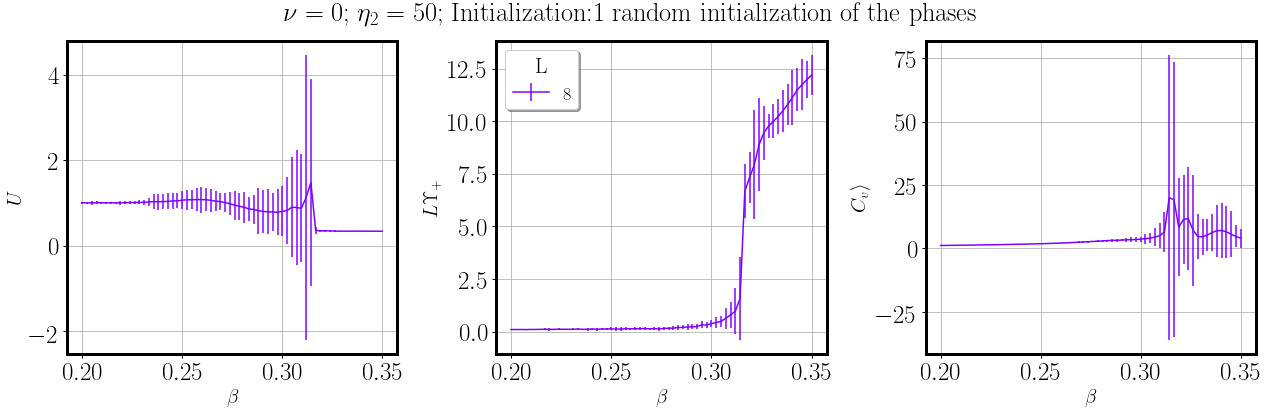

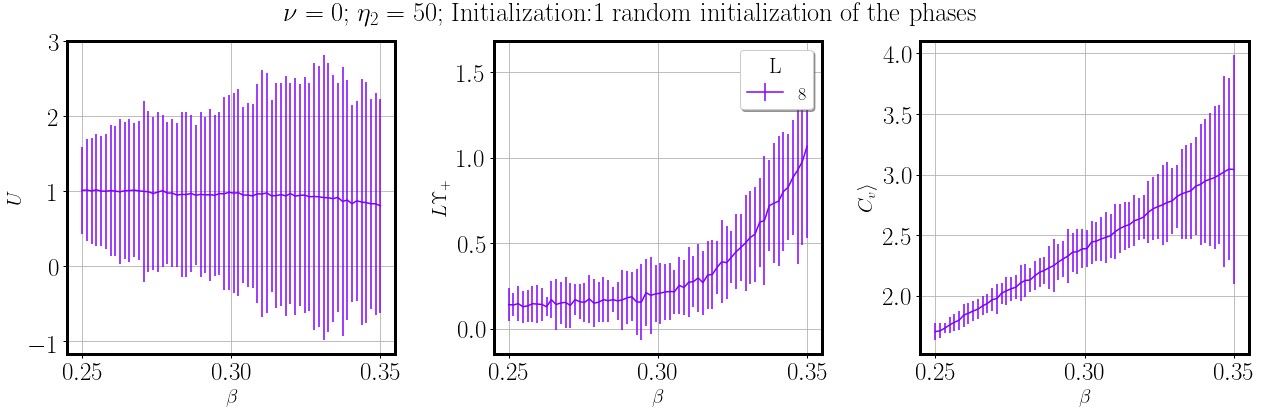

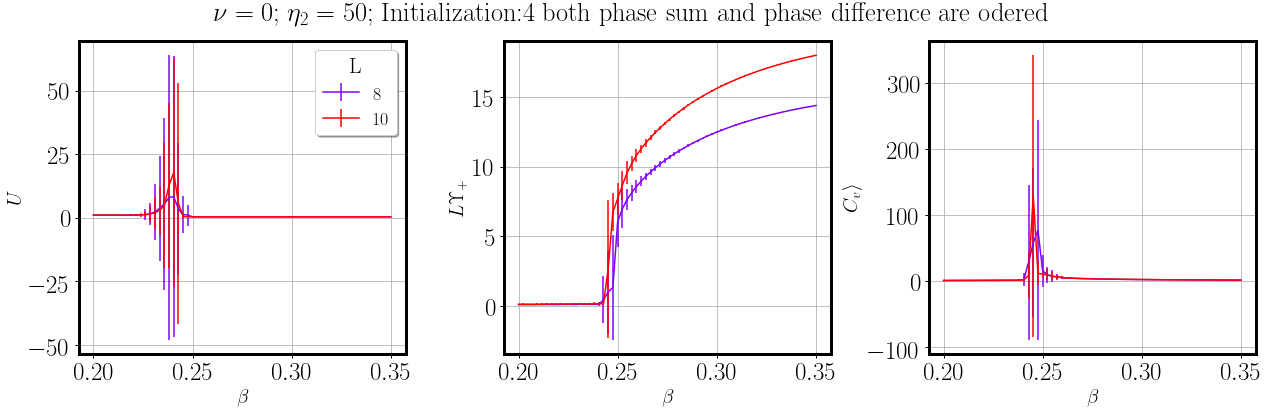

In [58]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import sys
import os
import math
from statsmodels.graphics.tsaplots import plot_acf
import statsmodels.api as sm
from statsmodels.tsa.stattools import acf
import scipy.integrate as integrate
import random
from scipy.optimize import fsolve
from scipy.optimize import bisect
from scipy.optimize import curve_fit

plt.rc('text',usetex=True)
plt.rc('text.latex', preamble=r'\usepackage{bm}')
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.serif'] = 'Computer Modern'
plt.rcParams['axes.linewidth']  = 3.0
plt.rcParams['axes.labelsize']  = 20
plt.rcParams.update({'font.size': 22})
plt.rcParams['xtick.labelsize'] = 25
plt.rcParams['ytick.labelsize'] = 25
plt.rcParams['xtick.major.size'] = 4
plt.rcParams['ytick.major.size'] = 4
plt.rcParams['xtick.minor.size'] = 3
plt.rcParams['ytick.minor.size'] = 3
plt.rcParams['legend.fontsize']  = 22
plt.rcParams['legend.frameon']  = True
plt.rcParams["legend.fancybox"] = True
plt.rcParams["legend.shadow"] = True
plt.rcParams["legend.framealpha"] = 1
plt.rcParams["axes.facecolor"] = 'white'
plt.rcParams["axes.edgecolor"] = 'black'

plt.rcParams['figure.figsize'] = 8, 8

plt.rcParams['xtick.major.width'] = 1
plt.rcParams['ytick.major.width'] = 1
plt.rcParams['xtick.minor.width'] = 0
plt.rcParams['ytick.minor.width'] = 0
bbox_props = dict(boxstyle="round", fc="w", ec="0.5", alpha=0.9)



e=0
nu=0
h=1
rho=1
alpha=1
eta1=0
eta2=50
blow=0.2
bhigh=0.35
Hinit_3=3
Hinit_4=4
Hinit_1=1
nMAX=30

LLIST=[8]#, 10, 12, 16, 20]#, 24, 32]

BASEDIR=("/home/ilaria/Desktop/MultiComponent_VillainModel/Output_Villain_2C/Model_Sym/e_%s/nu_%s/eta2_%s/h_%s" %(e, nu, eta2,  h))
folder_fig=("/home/ilaria/Desktop/MultiComponent_VillainModel/Output_Villain_2C/Model_Sym/Figures_new")

fig1, ax1 = plt.subplots(nrows=1, ncols=3, sharex=True, figsize=(18,6))
fig1.suptitle(r"$\nu=%s$; $\eta_2=%s$; Initialization:%s random initialization of the phases" %(nu, eta2, Hinit_1))
ax1[0].set_xlabel(r"$\beta$")
ax1[1].set_xlabel(r"$\beta$")
ax1[2].set_xlabel(r"$\beta$")
ax1[0].set_ylabel(r"$ U $")
ax1[1].set_ylabel(r"$ L\Upsilon_{+} $")
ax1[2].set_ylabel(r"$C_v \rangle$")

ax1[0].grid()
ax1[1].grid()
ax1[2].grid()


color=iter(plt.cm.rainbow(np.linspace(0,1,len(LLIST))))
for L in LLIST:
    c_m=next(color)
    HOMEDIR_1=("%s/L%s_rho%s_alpha%s_eta1%s_eta2%s_e%s_h%s_nu%s_bmin%s_bmax%s_nMAX%s_init%s" 
             %(BASEDIR, L, rho, alpha, eta1, eta2, e, h, nu, blow, bhigh, nMAX, Hinit_1))
       
    data_U=np.loadtxt("%s/Binder_cumulant.txt" %HOMEDIR_1)
    beta= data_U[0]
    U= data_U[1]
    err_U= data_U[2]

    data_M=np.loadtxt("%s/Magnetization.txt" %HOMEDIR_1)
    beta= data_M[0]
    M= data_M[1]
    err_M= data_M[2]

    beta, J_sum, err_J_sum=np.loadtxt("%s/Helicity_modulus_sum.txt" %HOMEDIR_1,  usecols=(0,1,2), unpack=True )
    beta, J_diff, err_J_diff=np.loadtxt("%s/Helicity_modulus_diff.txt" %HOMEDIR_1,  usecols=(0,1,2), unpack=True )

    Spijkenisse
    data_Cv=np.loadtxt("%s/Specific_Heat.txt" %HOMEDIR_1)
    beta= data_Cv[0]
    Cv= data_Cv[1]
    err_Cv= data_Cv[2]    
    
    ax1[0].errorbar(beta, U, yerr=err_U, fmt="-", c=c_m, label="%s" %L)
    ax1[1].errorbar(beta, L*J_sum, yerr=L*err_J_sum, fmt= "-", c=c_m, label="%s" %L)
    ax1[2].errorbar(beta, Cv, yerr=err_Cv, fmt= "-", c=c_m, label="%s" %L)
    

ax1[1].legend(loc="best", title="L", fontsize=18)
fig1.tight_layout()
fig1.subplots_adjust(wspace=0.3, top=0.9)
print(len(beta))
fig1.savefig("%s/New_e%s_nu%s_eta1%s_eta2%s_bmin%s_bmax%s_Hinit%s.png" %(folder_fig, e, nu, eta1, eta2, blow, bhigh, Hinit_1) )

blow=0.25
bhigh=0.35

fig1, ax1 = plt.subplots(nrows=1, ncols=3, sharex=True, figsize=(18,6))
fig1.suptitle(r"$\nu=%s$; $\eta_2=%s$; Initialization:%s random initialization of the phases" %(nu, eta2, Hinit_1))
ax1[0].set_xlabel(r"$\beta$")
ax1[1].set_xlabel(r"$\beta$")
ax1[2].set_xlabel(r"$\beta$")
ax1[0].set_ylabel(r"$ U $")
ax1[1].set_ylabel(r"$ L\Upsilon_{+} $")
ax1[2].set_ylabel(r"$C_v \rangle$")

ax1[0].grid()
ax1[1].grid()
ax1[2].grid()


color=iter(plt.cm.rainbow(np.linspace(0,1,len(LLIST))))
for L in LLIST:
    c_m=next(color)
    HOMEDIR_1=("%s/L%s_rho%s_alpha%s_eta1%s_eta2%s_e%s_h%s_nu%s_bmin%s_bmax%s_nMAX%s_init%s" 
             %(BASEDIR, L, rho, alpha, eta1, eta2, e, h, nu, blow, bhigh, nMAX, Hinit_1))
       
    data_U=np.loadtxt("%s/Binder_cumulant.txt" %HOMEDIR_1)
    beta= data_U[0]
    U= data_U[1]
    err_U= data_U[2]

    data_M=np.loadtxt("%s/Magnetization.txt" %HOMEDIR_1)
    beta= data_M[0]
    M= data_M[1]
    err_M= data_M[2]

    beta, J_sum, err_J_sum=np.loadtxt("%s/Helicity_modulus_sum.txt" %HOMEDIR_1,  usecols=(0,1,2), unpack=True )
    beta, J_diff, err_J_diff=np.loadtxt("%s/Helicity_modulus_diff.txt" %HOMEDIR_1,  usecols=(0,1,2), unpack=True )

    
    data_Cv=np.loadtxt("%s/Specific_Heat.txt" %HOMEDIR_1)
    beta= data_Cv[0]
    Cv= data_Cv[1]
    err_Cv= data_Cv[2]    
    
    ax1[0].errorbar(beta, U, yerr=err_U, fmt="-", c=c_m, label="%s" %L)
    ax1[1].errorbar(beta, L*J_sum, yerr=L*err_J_sum, fmt= "-", c=c_m, label="%s" %L)
    ax1[2].errorbar(beta, Cv, yerr=err_Cv, fmt= "-", c=c_m, label="%s" %L)
    

ax1[1].legend(loc="best", title="L", fontsize=18)
fig1.tight_layout()
fig1.subplots_adjust(wspace=0.3, top=0.9)
print(len(beta))
fig1.savefig("%s/New_e%s_nu%s_eta1%s_eta2%s_bmin%s_bmax%s_Hinit%s.png" %(folder_fig, e, nu, eta1, eta2, blow, bhigh, Hinit_1) )

fig3, ax3 = plt.subplots(nrows=1, ncols=3, sharex=True, figsize=(18,6))
fig3.suptitle(r"$\nu=%s$; $\eta_2=%s$; Initialization:%s both phase sum and phase difference are odered" %(nu, eta2, Hinit_4))
ax3[0].set_xlabel(r"$\beta$")
ax3[1].set_xlabel(r"$\beta$")
ax3[2].set_xlabel(r"$\beta$")
ax3[0].set_ylabel(r"$ U $")
ax3[1].set_ylabel(r"$ L\Upsilon_{+} $")
ax3[2].set_ylabel(r"$C_v \rangle$")

ax3[0].grid()
ax3[1].grid()
ax3[2].grid()

blow=0.2
bhigh=0.35

LLIST=[8, 10]
color=iter(plt.cm.rainbow(np.linspace(0,1,len(LLIST))))

for L in LLIST:
    c_m=next(color)


    HOMEDIR_3=("%s/L%s_rho%s_alpha%s_eta1%s_eta2%s_e%s_h%s_nu%s_bmin%s_bmax%s_nMAX%s_init%s" 
             %(BASEDIR, L, rho, alpha, eta1, eta2, e, h, nu, blow, bhigh, nMAX, Hinit_4))
       
    data_U=np.loadtxt("%s/Binder_cumulant.txt" %HOMEDIR_3)
    beta= data_U[0]
    U= data_U[1]
    err_U= data_U[2]

    data_M=np.loadtxt("%s/Magnetization.txt" %HOMEDIR_3)
    beta= data_M[0]
    M= data_M[1]
    err_M= data_M[2]
    beta, J_sum, err_J_sum=np.loadtxt("%s/Helicity_modulus_sum.txt" %HOMEDIR_3,  usecols=(0,1,2), unpack=True )
    beta, J_diff, err_J_diff=np.loadtxt("%s/Helicity_modulus_diff.txt" %HOMEDIR_3,  usecols=(0,1,2), unpack=True )

    
    data_Cv=np.loadtxt("%s/Specific_Heat.txt" %HOMEDIR_3)
    beta= data_Cv[0]
    Cv= data_Cv[1]
    err_Cv= data_Cv[2]    
    
    ax3[0].errorbar(beta, U, yerr=err_U, fmt="-", c=c_m, label="%s" %L)
    ax3[1].errorbar(beta, L*J_sum, yerr=L*err_J_sum, fmt= "-", c=c_m, label="%s" %L)
    ax3[2].errorbar(beta, Cv, yerr=err_Cv, fmt= "-", c=c_m, label="%s" %L)    
    

ax3[0].legend(loc="best", title="L", fontsize=18)
fig3.tight_layout()
fig3.subplots_adjust(wspace=0.3, top=0.9)
print(len(beta))
fig3.savefig("%s/New_e%s_nu%s_eta1%s_eta2%s_bmin%s_bmax%s_Hinit%s.png" %(folder_fig, e, nu, eta1, eta2, blow, bhigh, Hinit_4) )


64


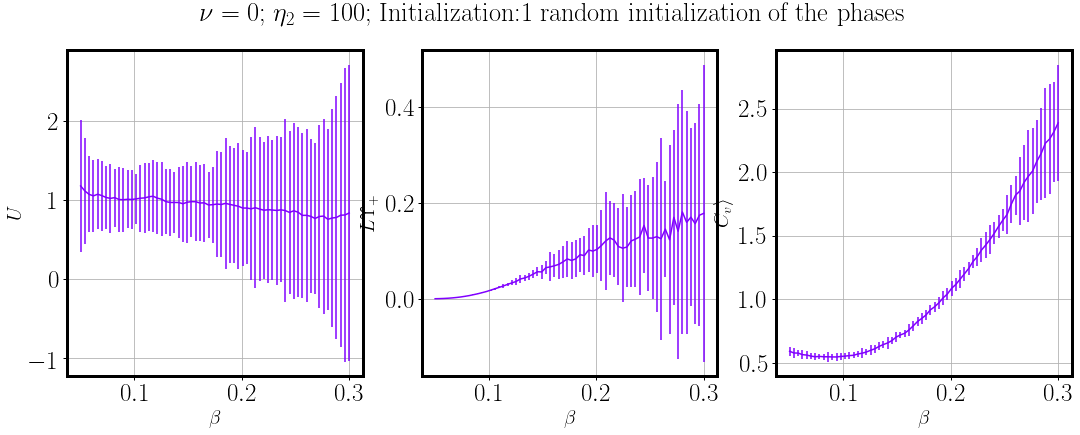

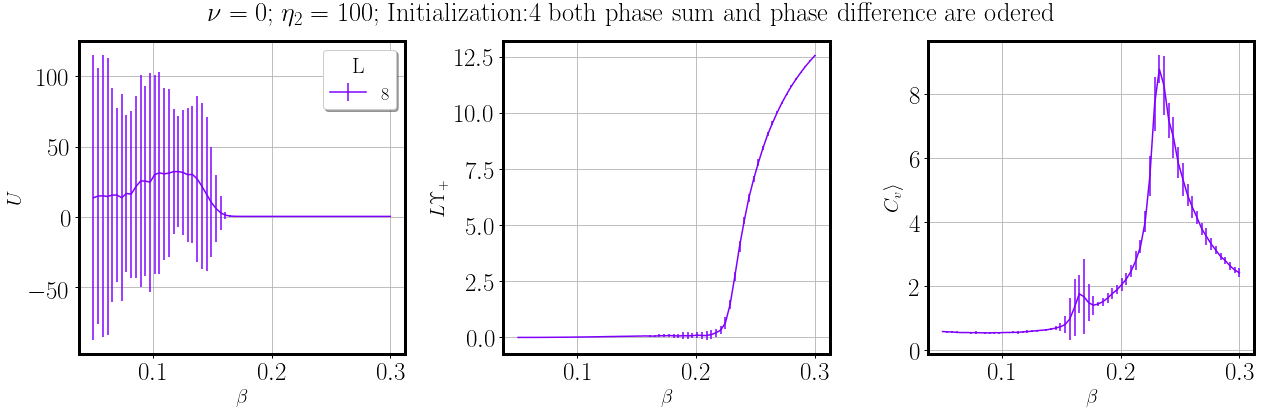

In [56]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import sys
import os
import math
from statsmodels.graphics.tsaplots import plot_acf
import statsmodels.api as sm
from statsmodels.tsa.stattools import acf
import scipy.integrate as integrate
import random
from scipy.optimize import fsolve
from scipy.optimize import bisect
from scipy.optimize import curve_fit

plt.rc('text',usetex=True)
plt.rc('text.latex', preamble=r'\usepackage{bm}')
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.serif'] = 'Computer Modern'
plt.rcParams['axes.linewidth']  = 3.0
plt.rcParams['axes.labelsize']  = 20
plt.rcParams.update({'font.size': 22})
plt.rcParams['xtick.labelsize'] = 25
plt.rcParams['ytick.labelsize'] = 25
plt.rcParams['xtick.major.size'] = 4
plt.rcParams['ytick.major.size'] = 4
plt.rcParams['xtick.minor.size'] = 3
plt.rcParams['ytick.minor.size'] = 3
plt.rcParams['legend.fontsize']  = 22
plt.rcParams['legend.frameon']  = True
plt.rcParams["legend.fancybox"] = True
plt.rcParams["legend.shadow"] = True
plt.rcParams["legend.framealpha"] = 1
plt.rcParams["axes.facecolor"] = 'white'
plt.rcParams["axes.edgecolor"] = 'black'

plt.rcParams['figure.figsize'] = 8, 8

plt.rcParams['xtick.major.width'] = 1
plt.rcParams['ytick.major.width'] = 1
plt.rcParams['xtick.minor.width'] = 0
plt.rcParams['ytick.minor.width'] = 0
bbox_props = dict(boxstyle="round", fc="w", ec="0.5", alpha=0.9)



e=0
nu=0
h=1
rho=1
alpha=1
eta1=0
eta2=100
blow=0.05
bhigh=0.3
Hinit_3=3
Hinit_4=4
Hinit_1=1
nMAX=30

LLIST=[8]#, 10, 12, 16, 20, 24, 32]

BASEDIR=("/home/ilaria/Desktop/MultiComponent_VillainModel/Output_Villain_2C/Model_Sym/e_%s/nu_%s/eta2_%s/h_%s" %(e, nu, eta2,  h))
folder_fig=("/home/ilaria/Desktop/MultiComponent_VillainModel/Output_Villain_2C/Model_Sym/Figures_new")

fig1, ax1 = plt.subplots(nrows=1, ncols=3, sharex=True, figsize=(18,6))
fig1.suptitle(r"$\nu=%s$; $\eta_2=%s$; Initialization:%s random initialization of the phases" %(nu, eta2, Hinit_1))
ax1[0].set_xlabel(r"$\beta$")
ax1[1].set_xlabel(r"$\beta$")
ax1[2].set_xlabel(r"$\beta$")
ax1[0].set_ylabel(r"$ U $")
ax1[1].set_ylabel(r"$ L\Upsilon_{+} $")
ax1[2].set_ylabel(r"$C_v \rangle$")

ax1[0].grid()
ax1[1].grid()
ax1[2].grid()


fig3, ax3 = plt.subplots(nrows=1, ncols=3, sharex=True, figsize=(18,6))
fig3.suptitle(r"$\nu=%s$; $\eta_2=%s$; Initialization:%s both phase sum and phase difference are odered" %(nu, eta2, Hinit_4))
ax3[0].set_xlabel(r"$\beta$")
ax3[1].set_xlabel(r"$\beta$")
ax3[2].set_xlabel(r"$\beta$")
ax3[0].set_ylabel(r"$ U $")
ax3[1].set_ylabel(r"$ L\Upsilon_{+} $")
ax3[2].set_ylabel(r"$C_v \rangle$")

ax3[0].grid()
ax3[1].grid()
ax3[2].grid()


color=iter(plt.cm.rainbow(np.linspace(0,1,len(LLIST))))
for L in LLIST:
    c_m=next(color)

    HOMEDIR_1=("%s/L%s_rho%s_alpha%s_eta1%s_eta2%s_e%s_h%s_nu%s_bmin%s_bmax%s_nMAX%s_init%s"%(BASEDIR, L, rho, alpha, eta1, eta2, e, h, nu, blow, bhigh, nMAX, Hinit_1))
    
    data_U=np.loadtxt("%s/Binder_cumulant.txt" %HOMEDIR_1)
    beta= data_U[0]
    U= data_U[1]
    err_U= data_U[2]

    data_M=np.loadtxt("%s/Magnetization.txt" %HOMEDIR_1)
    beta= data_M[0]
    M= data_M[1]
    err_M= data_M[2]

    beta, J_sum, err_J_sum=np.loadtxt("%s/Helicity_modulus_sum.txt" %HOMEDIR_1,  usecols=(0,1,2), unpack=True )
    beta, J_diff, err_J_diff=np.loadtxt("%s/Helicity_modulus_diff.txt" %HOMEDIR_1,  usecols=(0,1,2), unpack=True )

    
    data_Cv=np.loadtxt("%s/Specific_Heat.txt" %HOMEDIR_1)
    beta= data_Cv[0]
    Cv= data_Cv[1]
    err_Cv= data_Cv[2]    
    
    ax1[0].errorbar(beta, U, yerr=err_U, fmt="-", c=c_m, label="%s" %L)
    ax1[1].errorbar(beta, L*J_sum, yerr=L*err_J_sum, fmt= "-", c=c_m, label="%s" %L)
    ax1[2].errorbar(beta, Cv, yerr=err_Cv, fmt= "-", c=c_m, label="%s" %L)
    
    # HOMEDIR_2=("%s/L%s_rho%s_alpha%s_eta1%s_eta2%s_e%s_h%s_nu%s_bmin%s_bmax%s_nMAX%s_init%s" 
    #          %(BASEDIR, L, rho, alpha, eta1, eta2, e, h, nu, blow, bhigh, nMAX, Hinit_3))
       
    # data_U=np.loadtxt("%s/Binder_cumulant.txt" %HOMEDIR_2)
    # beta= data_U[0]
    # U= data_U[1]
    # err_U= data_U[2]

    # data_M=np.loadtxt("%s/Magnetization.txt" %HOMEDIR_2)
    # beta= data_M[0]
    # M= data_M[1]
    # err_M= data_M[2]

    # beta, J_sum, err_J_sum=np.loadtxt("%s/Helicity_modulus_sum.txt" %HOMEDIR_2,  usecols=(0,1,2), unpack=True )
    # beta, J_diff, err_J_diff=np.loadtxt("%s/Helicity_modulus_diff.txt" %HOMEDIR_2,  usecols=(0,1,2), unpack=True )

    
    # data_Cv=np.loadtxt("%s/Specific_Heat.txt" %HOMEDIR_2)
    # beta= data_Cv[0]
    # Cv= data_Cv[1]
    # err_Cv= data_Cv[2]    
    
    # ax2[0].errorbar(beta, U, yerr=err_U, fmt="-", c=c_m, label="%s" %L)
    # ax2[1].errorbar(beta, L*J_sum, yerr=L*err_J_sum, fmt= "-", c=c_m, label="%s" %L)
    # ax2[2].errorbar(beta, Cv, yerr=err_Cv, fmt= "-", c=c_m, label="%s" %L)    
    
    HOMEDIR_3=("%s/L%s_rho%s_alpha%s_eta1%s_eta2%s_e%s_h%s_nu%s_bmin%s_bmax%s_nMAX%s_init%s" 
             %(BASEDIR, L, rho, alpha, eta1, eta2, e, h, nu, blow, bhigh, nMAX, Hinit_4))
       
    data_U=np.loadtxt("%s/Binder_cumulant.txt" %HOMEDIR_3)
    beta= data_U[0]
    U= data_U[1]
    err_U= data_U[2]

    data_M=np.loadtxt("%s/Magnetization.txt" %HOMEDIR_3)
    beta= data_M[0]
    M= data_M[1]
    err_M= data_M[2]

    beta, J_sum, err_J_sum=np.loadtxt("%s/Helicity_modulus_sum.txt" %HOMEDIR_3,  usecols=(0,1,2), unpack=True )
    beta, J_diff, err_J_diff=np.loadtxt("%s/Helicity_modulus_diff.txt" %HOMEDIR_3,  usecols=(0,1,2), unpack=True )

    
    data_Cv=np.loadtxt("%s/Specific_Heat.txt" %HOMEDIR_3)
    beta= data_Cv[0]
    Cv= data_Cv[1]
    err_Cv= data_Cv[2]    
    
    ax3[0].errorbar(beta, U, yerr=err_U, fmt="-", c=c_m, label="%s" %L)
    ax3[1].errorbar(beta, L*J_sum, yerr=L*err_J_sum, fmt= "-", c=c_m, label="%s" %L)
    ax3[2].errorbar(beta, Cv, yerr=err_Cv, fmt= "-", c=c_m, label="%s" %L)    
    
# # ax1[1].set_ylim((-0.5,5))
# ax1[1].legend(loc="best", title="L", fontsize=18)
# fig1.tight_layout()
# fig1.subplots_adjust(wspace=0.3, top=0.9)
# print(len(beta))
# fig1.savefig("%s/New_e%s_nu%s_eta1%s_eta2%s_bmin%s_bmax%s_Hinit%s.png" %(folder_fig, e, nu, eta1, eta2, blow, bhigh, Hinit_1) )

# ax2[1].legend(loc="best", title="L", fontsize=18)
# fig2.tight_layout()
# fig2.subplots_adjust(wspace=0.3, top=0.9)
# print(len(beta))
# fig2.savefig("%s/New_e%s_nu%s_eta1%s_eta2%s_bmin%s_bmax%s_Hinit%s.png" %(folder_fig, e, nu, eta1, eta2, blow, bhigh, Hinit_3) )


ax3[0].legend(loc="best", title="L", fontsize=18)
fig3.tight_layout()
fig3.subplots_adjust(wspace=0.3, top=0.9)
print(len(beta))
fig3.savefig("%s/New_e%s_nu%s_eta1%s_eta2%s_bmin%s_bmax%s_Hinit%s.png" %(folder_fig, e, nu, eta1, eta2, blow, bhigh, Hinit_4) )


64
64


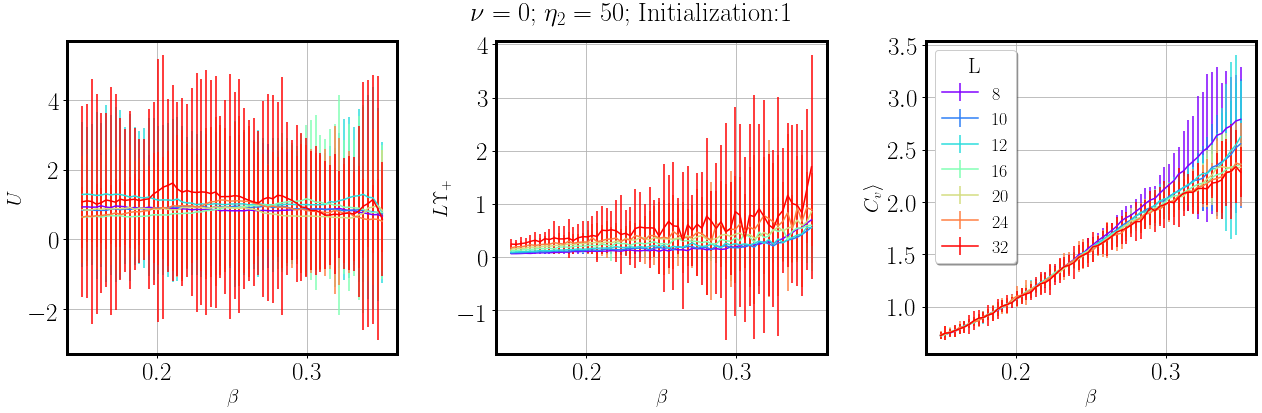

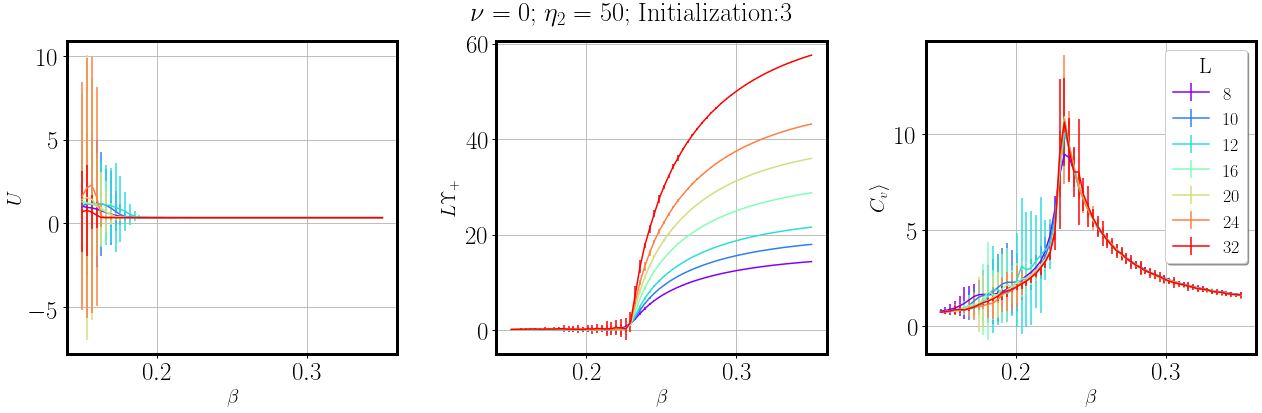

In [29]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import sys
import os
import math
from statsmodels.graphics.tsaplots import plot_acf
import statsmodels.api as sm
from statsmodels.tsa.stattools import acf
import scipy.integrate as integrate
import random
from scipy.optimize import fsolve
from scipy.optimize import bisect
from scipy.optimize import curve_fit

plt.rc('text',usetex=True)
plt.rc('text.latex', preamble=r'\usepackage{bm}')
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.serif'] = 'Computer Modern'
plt.rcParams['axes.linewidth']  = 3.0
plt.rcParams['axes.labelsize']  = 20
plt.rcParams.update({'font.size': 22})
plt.rcParams['xtick.labelsize'] = 25
plt.rcParams['ytick.labelsize'] = 25
plt.rcParams['xtick.major.size'] = 4
plt.rcParams['ytick.major.size'] = 4
plt.rcParams['xtick.minor.size'] = 3
plt.rcParams['ytick.minor.size'] = 3
plt.rcParams['legend.fontsize']  = 22
plt.rcParams['legend.frameon']  = True
plt.rcParams["legend.fancybox"] = True
plt.rcParams["legend.shadow"] = True
plt.rcParams["legend.framealpha"] = 1
plt.rcParams["axes.facecolor"] = 'white'
plt.rcParams["axes.edgecolor"] = 'black'

plt.rcParams['figure.figsize'] = 8, 8

plt.rcParams['xtick.major.width'] = 1
plt.rcParams['ytick.major.width'] = 1
plt.rcParams['xtick.minor.width'] = 0
plt.rcParams['ytick.minor.width'] = 0
bbox_props = dict(boxstyle="round", fc="w", ec="0.5", alpha=0.9)



e=0
nu=0
h=1
rho=1
alpha=1
eta1=0
eta2=50
blow=0.15
bhigh=0.35
Hinit_3=3
Hinit_1=1
nMAX=30

LLIST=[8, 10, 12, 16, 20, 24, 32 ]

BASEDIR=("/home/ilaria/Desktop/MultiComponent_VillainModel/Output_Villain_2C/Model_Sym/e_%s/nu_%s/eta2_%s/h_%s" %(e, nu, eta2,  h))
folder_fig=("/home/ilaria/Desktop/MultiComponent_VillainModel/Output_Villain_2C/Model_Sym/Figures_new")

fig1, ax1 = plt.subplots(nrows=1, ncols=3, sharex=True, figsize=(18,6))
fig1.suptitle(r"$\nu=%s$; $\eta_2=%s$; Initialization:%s" %(nu, eta2, Hinit_1))
ax1[0].set_xlabel(r"$\beta$")
ax1[1].set_xlabel(r"$\beta$")
ax1[2].set_xlabel(r"$\beta$")
ax1[0].set_ylabel(r"$ U $")
ax1[1].set_ylabel(r"$ L\Upsilon_{+} $")
ax1[2].set_ylabel(r"$C_v \rangle$")

ax1[0].grid()
ax1[1].grid()
ax1[2].grid()


fig3, ax3 = plt.subplots(nrows=1, ncols=3, sharex=True, figsize=(18,6))
fig3.suptitle(r"$\nu=%s$; $\eta_2=%s$; Initialization:%s" %(nu, eta2, Hinit_3))
ax3[0].set_xlabel(r"$\beta$")
ax3[1].set_xlabel(r"$\beta$")
ax3[2].set_xlabel(r"$\beta$")
ax3[0].set_ylabel(r"$ U $")
ax3[1].set_ylabel(r"$ L\Upsilon_{+} $")
ax3[2].set_ylabel(r"$C_v \rangle$")

ax3[0].grid()
ax3[1].grid()
ax3[2].grid()


color=iter(plt.cm.rainbow(np.linspace(0,1,len(LLIST))))
for L in LLIST:
    c_m=next(color)

    HOMEDIR_1=("%s/L%s_rho%s_alpha%s_eta1%s_eta2%s_e%s_h%s_nu%s_bmin%s_bmax%s_nMAX%s_init%s" 
             %(BASEDIR, L, rho, alpha, eta1, eta2, e, h, nu, blow, bhigh, nMAX, Hinit_1))
       
    data_U=np.loadtxt("%s/Binder_cumulant.txt" %HOMEDIR_1)
    beta= data_U[0]
    U= data_U[1]
    err_U= data_U[2]

    data_M=np.loadtxt("%s/Magnetization.txt" %HOMEDIR_1)
    beta= data_M[0]
    M= data_M[1]
    err_M= data_M[2]

    beta, J_sum, err_J_sum=np.loadtxt("%s/Helicity_modulus_sum.txt" %HOMEDIR_1,  usecols=(0,1,2), unpack=True )
    beta, J_diff, err_J_diff=np.loadtxt("%s/Helicity_modulus_diff.txt" %HOMEDIR_1,  usecols=(0,1,2), unpack=True )

    
    data_Cv=np.loadtxt("%s/Specific_Heat.txt" %HOMEDIR_1)
    beta= data_Cv[0]
    Cv= data_Cv[1]
    err_Cv= data_Cv[2]    
    
    ax1[0].errorbar(beta, U, yerr=err_U, fmt="-", c=c_m, label="%s" %L)
    ax1[1].errorbar(beta, L*J_sum, yerr=L*err_J_sum, fmt= "-", c=c_m, label="%s" %L)
    ax1[2].errorbar(beta, Cv, yerr=err_Cv, fmt= "-", c=c_m, label="%s" %L)

    HOMEDIR_3=("%s/L%s_rho%s_alpha%s_eta1%s_eta2%s_e%s_h%s_nu%s_bmin%s_bmax%s_nMAX%s_init%s" 
             %(BASEDIR, L, rho, alpha, eta1, eta2, e, h, nu, blow, bhigh, nMAX, Hinit_3))
       
    data_U=np.loadtxt("%s/Binder_cumulant.txt" %HOMEDIR_3)
    beta= data_U[0]
    U= data_U[1]
    err_U= data_U[2]

    data_M=np.loadtxt("%s/Magnetization.txt" %HOMEDIR_3)
    beta= data_M[0]
    M= data_M[1]
    err_M= data_M[2]

    beta, J_sum, err_J_sum=np.loadtxt("%s/Helicity_modulus_sum.txt" %HOMEDIR_3,  usecols=(0,1,2), unpack=True )
    beta, J_diff, err_J_diff=np.loadtxt("%s/Helicity_modulus_diff.txt" %HOMEDIR_3,  usecols=(0,1,2), unpack=True )

    
    data_Cv=np.loadtxt("%s/Specific_Heat.txt" %HOMEDIR_3)
    beta= data_Cv[0]
    Cv= data_Cv[1]
    err_Cv= data_Cv[2]    
    
    ax3[0].errorbar(beta, U, yerr=err_U, fmt="-", c=c_m, label="%s" %L)
    ax3[1].errorbar(beta, L*J_sum, yerr=L*err_J_sum, fmt= "-", c=c_m, label="%s" %L)
    ax3[2].errorbar(beta, Cv, yerr=err_Cv, fmt= "-", c=c_m, label="%s" %L)    
    
# ax1[1].set_ylim((-0.5,5))
ax1[2].legend(loc="best", title="L", fontsize=18)
fig1.tight_layout()
fig1.subplots_adjust(wspace=0.3, top=0.9)
print(len(beta))
fig1.savefig("%s/New_e%s_nu%s_eta1%s_eta2%s_bmin%s_bmax%s.png" %(folder_fig, e, nu, eta1, eta2, blow, bhigh) )

ax3[2].legend(loc="best", title="L", fontsize=18)
fig3.tight_layout()
fig3.subplots_adjust(wspace=0.3, top=0.9)
print(len(beta))
fig3.savefig("%s/New_e%s_nu%s_eta1%s_eta2%s_bmin%s_bmax%s.png" %(folder_fig, e, nu, eta1, eta2, blow, bhigh) )

64
64


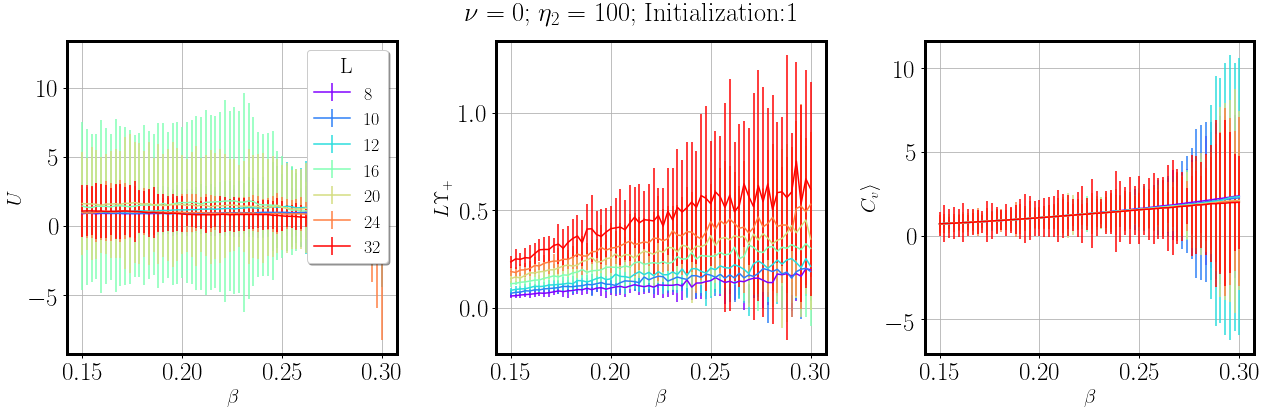

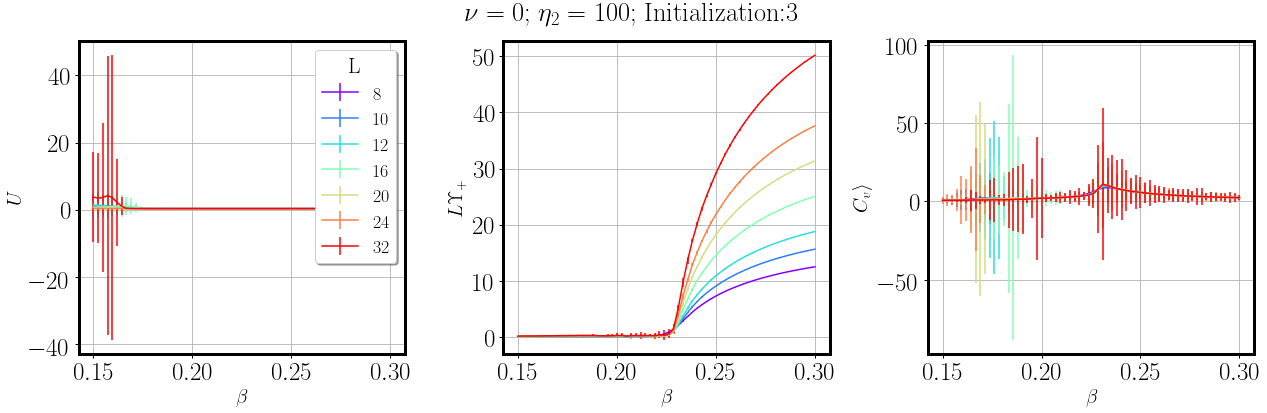

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import sys
import os
import math
from statsmodels.graphics.tsaplots import plot_acf
import statsmodels.api as sm
from statsmodels.tsa.stattools import acf
import scipy.integrate as integrate
import random
from scipy.optimize import fsolve
from scipy.optimize import bisect
from scipy.optimize import curve_fit

plt.rc('text',usetex=True)
plt.rc('text.latex', preamble=r'\usepackage{bm}')
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.serif'] = 'Computer Modern'
plt.rcParams['axes.linewidth']  = 3.0
plt.rcParams['axes.labelsize']  = 20
plt.rcParams.update({'font.size': 22})
plt.rcParams['xtick.labelsize'] = 25
plt.rcParams['ytick.labelsize'] = 25
plt.rcParams['xtick.major.size'] = 4
plt.rcParams['ytick.major.size'] = 4
plt.rcParams['xtick.minor.size'] = 3
plt.rcParams['ytick.minor.size'] = 3
plt.rcParams['legend.fontsize']  = 22
plt.rcParams['legend.frameon']  = True
plt.rcParams["legend.fancybox"] = True
plt.rcParams["legend.shadow"] = True
plt.rcParams["legend.framealpha"] = 1
plt.rcParams["axes.facecolor"] = 'white'
plt.rcParams["axes.edgecolor"] = 'black'

plt.rcParams['figure.figsize'] = 8, 8

plt.rcParams['xtick.major.width'] = 1
plt.rcParams['ytick.major.width'] = 1
plt.rcParams['xtick.minor.width'] = 0
plt.rcParams['ytick.minor.width'] = 0
bbox_props = dict(boxstyle="round", fc="w", ec="0.5", alpha=0.9)



e=0
nu=0
h=1
rho=1
alpha=1
eta1=0
eta2=100
blow=0.15
bhigh=0.3
Hinit_3=3
Hinit_1=1
nMAX=30

LLIST=[8, 10, 12, 16, 20, 24, 32 ]

BASEDIR=("/home/ilaria/Desktop/MultiComponent_VillainModel/Output_Villain_2C/Model_Sym/e_%s/nu_%s/eta2_%s/h_%s" %(e, nu, eta2,  h))
folder_fig=("/home/ilaria/Desktop/MultiComponent_VillainModel/Output_Villain_2C/Model_Sym/Figures_new")

fig1, ax1 = plt.subplots(nrows=1, ncols=3, sharex=True, figsize=(18,6))
fig1.suptitle(r"$\nu=%s$; $\eta_2=%s$; Initialization:%s" %(nu, eta2, Hinit_1))
ax1[0].set_xlabel(r"$\beta$")
ax1[1].set_xlabel(r"$\beta$")
ax1[2].set_xlabel(r"$\beta$")
ax1[0].set_ylabel(r"$ U $")
ax1[1].set_ylabel(r"$ L\Upsilon_{+} $")
ax1[2].set_ylabel(r"$C_v \rangle$")

ax1[0].grid()
ax1[1].grid()
ax1[2].grid()


fig3, ax3 = plt.subplots(nrows=1, ncols=3, sharex=True, figsize=(18,6))
fig3.suptitle(r"$\nu=%s$; $\eta_2=%s$; Initialization:%s" %(nu, eta2, Hinit_3))
ax3[0].set_xlabel(r"$\beta$")
ax3[1].set_xlabel(r"$\beta$")
ax3[2].set_xlabel(r"$\beta$")
#ax1[3].set_xlabel(r"$\beta$")
ax3[0].set_ylabel(r"$ U $")
ax3[1].set_ylabel(r"$ L\Upsilon_{+} $")
#ax1[2].set_ylabel(r" L\Upsilon_{-} $")
ax3[2].set_ylabel(r"$C_v \rangle$")

ax3[0].grid()
ax3[1].grid()
ax3[2].grid()


color=iter(plt.cm.rainbow(np.linspace(0,1,len(LLIST))))
for L in LLIST:
    c_m=next(color)

    HOMEDIR_1=("%s/L%s_rho%s_alpha%s_eta1%s_eta2%s_e%s_h%s_nu%s_bmin%s_bmax%s_nMAX%s_init%s" 
             %(BASEDIR, L, rho, alpha, eta1, eta2, e, h, nu, blow, bhigh, nMAX, Hinit_1))
       
    data_U=np.loadtxt("%s/Binder_cumulant.txt" %HOMEDIR_1)
    beta= data_U[0]
    U= data_U[1]
    err_U= data_U[2]

    data_M=np.loadtxt("%s/Magnetization.txt" %HOMEDIR_1)
    beta= data_M[0]
    M= data_M[1]
    err_M= data_M[2]

    beta, J_sum, err_J_sum=np.loadtxt("%s/Helicity_modulus_sum.txt" %HOMEDIR_1,  usecols=(0,1,2), unpack=True )
    beta, J_diff, err_J_diff=np.loadtxt("%s/Helicity_modulus_diff.txt" %HOMEDIR_1,  usecols=(0,1,2), unpack=True )

    
    data_Cv=np.loadtxt("%s/Specific_Heat.txt" %HOMEDIR_1)
    beta= data_Cv[0]
    Cv= data_Cv[1]
    err_Cv= data_Cv[2]    
    
    ax1[0].errorbar(beta, U, yerr=err_U, fmt="-", c=c_m, label="%s" %L)
    ax1[1].errorbar(beta, L*J_sum, yerr=L*err_J_sum, fmt= "-", c=c_m, label="%s" %L)
    ax1[2].errorbar(beta, Cv, yerr=L*err_Cv, fmt= "-", c=c_m, label="%s" %L)

    HOMEDIR_3=("%s/L%s_rho%s_alpha%s_eta1%s_eta2%s_e%s_h%s_nu%s_bmin%s_bmax%s_nMAX%s_init%s" 
             %(BASEDIR, L, rho, alpha, eta1, eta2, e, h, nu, blow, bhigh, nMAX, Hinit_3))
       
    data_U=np.loadtxt("%s/Binder_cumulant.txt" %HOMEDIR_3)
    beta= data_U[0]
    U= data_U[1]
    err_U= data_U[2]

    data_M=np.loadtxt("%s/Magnetization.txt" %HOMEDIR_3)
    beta= data_M[0]
    M= data_M[1]
    err_M= data_M[2]

    beta, J_sum, err_J_sum=np.loadtxt("%s/Helicity_modulus_sum.txt" %HOMEDIR_3,  usecols=(0,1,2), unpack=True )
    beta, J_diff, err_J_diff=np.loadtxt("%s/Helicity_modulus_diff.txt" %HOMEDIR_3,  usecols=(0,1,2), unpack=True )

    
    data_Cv=np.loadtxt("%s/Specific_Heat.txt" %HOMEDIR_3)
    beta= data_Cv[0]
    Cv= data_Cv[1]
    err_Cv= data_Cv[2]    
    
    ax3[0].errorbar(beta, U, yerr=err_U, fmt="-", c=c_m, label="%s" %L)
    ax3[1].errorbar(beta, L*J_sum, yerr=L*err_J_sum, fmt= "-", c=c_m, label="%s" %L)
    ax3[2].errorbar(beta, Cv, yerr=L*err_Cv, fmt= "-", c=c_m, label="%s" %L)    
    
# ax1[1].set_ylim((-0.5,5))
ax1[0].legend(loc="best", title="L", fontsize=18)
fig1.tight_layout()
fig1.subplots_adjust(wspace=0.3, top=0.9)
print(len(beta))
fig1.savefig("%s/New_e%s_nu%s_eta1%s_eta2%s_bmin%s_bmax%s.png" %(folder_fig, e, nu, eta1, eta2, blow, bhigh) )

ax3[0].legend(loc="best", title="L", fontsize=18)
fig3.tight_layout()
fig3.subplots_adjust(wspace=0.3, top=0.9)
print(len(beta))
fig3.savefig("%s/New_e%s_nu%s_eta1%s_eta2%s_bmin%s_bmax%s.png" %(folder_fig, e, nu, eta1, eta2, blow, bhigh) )

No handles with labels found to put in legend.


64
64


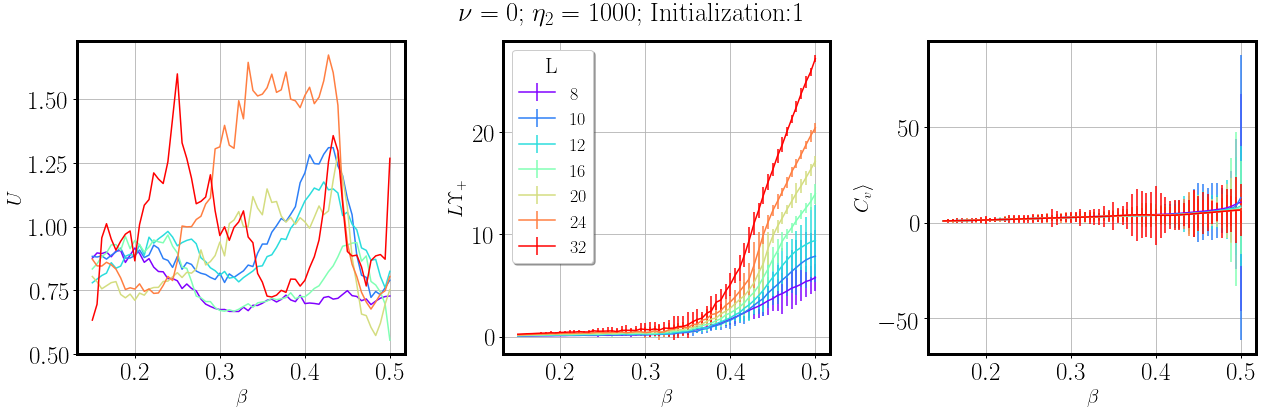

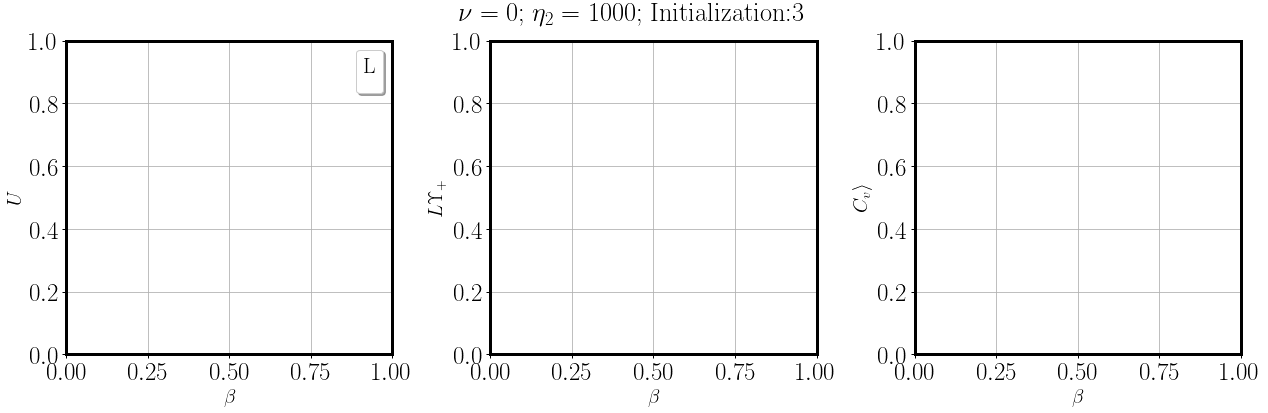

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import sys
import os
import math
from statsmodels.graphics.tsaplots import plot_acf
import statsmodels.api as sm
from statsmodels.tsa.stattools import acf
import scipy.integrate as integrate
import random
from scipy.optimize import fsolve
from scipy.optimize import bisect
from scipy.optimize import curve_fit

plt.rc('text',usetex=True)
plt.rc('text.latex', preamble=r'\usepackage{bm}')
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.serif'] = 'Computer Modern'
plt.rcParams['axes.linewidth']  = 3.0
plt.rcParams['axes.labelsize']  = 20
plt.rcParams.update({'font.size': 22})
plt.rcParams['xtick.labelsize'] = 25
plt.rcParams['ytick.labelsize'] = 25
plt.rcParams['xtick.major.size'] = 4
plt.rcParams['ytick.major.size'] = 4
plt.rcParams['xtick.minor.size'] = 3
plt.rcParams['ytick.minor.size'] = 3
plt.rcParams['legend.fontsize']  = 22
plt.rcParams['legend.frameon']  = True
plt.rcParams["legend.fancybox"] = True
plt.rcParams["legend.shadow"] = True
plt.rcParams["legend.framealpha"] = 1
plt.rcParams["axes.facecolor"] = 'white'
plt.rcParams["axes.edgecolor"] = 'black'

plt.rcParams['figure.figsize'] = 8, 8

plt.rcParams['xtick.major.width'] = 1
plt.rcParams['ytick.major.width'] = 1
plt.rcParams['xtick.minor.width'] = 0
plt.rcParams['ytick.minor.width'] = 0
bbox_props = dict(boxstyle="round", fc="w", ec="0.5", alpha=0.9)



e=0
nu=0
h=1
rho=1
alpha=1
eta1=0
eta2=1000
blow=0.15
bhigh=0.5
Hinit_3=3
Hinit_1=1
nMAX=30

LLIST=[8, 10, 12, 16, 20, 24, 32 ]

BASEDIR=("/home/ilaria/Desktop/MultiComponent_VillainModel/Output_Villain_2C/Model_Sym/e_%s/nu_%s/eta2_%s/h_%s" %(e, nu, eta2,  h))
folder_fig=("/home/ilaria/Desktop/MultiComponent_VillainModel/Output_Villain_2C/Model_Sym/Figures_new")

fig1, ax1 = plt.subplots(nrows=1, ncols=3, sharex=True, figsize=(18,6))
fig1.suptitle(r"$\nu=%s$; $\eta_2=%s$; Initialization:%s" %(nu, eta2, Hinit_1))
ax1[0].set_xlabel(r"$\beta$")
ax1[1].set_xlabel(r"$\beta$")
ax1[2].set_xlabel(r"$\beta$")
ax1[0].set_ylabel(r"$ U $")
ax1[1].set_ylabel(r"$ L\Upsilon_{+} $")
ax1[2].set_ylabel(r"$C_v \rangle$")

ax1[0].grid()
ax1[1].grid()
ax1[2].grid()


fig3, ax3 = plt.subplots(nrows=1, ncols=3, sharex=True, figsize=(18,6))
fig3.suptitle(r"$\nu=%s$; $\eta_2=%s$; Initialization:%s" %(nu, eta2, Hinit_3))
ax3[0].set_xlabel(r"$\beta$")
ax3[1].set_xlabel(r"$\beta$")
ax3[2].set_xlabel(r"$\beta$")
#ax1[3].set_xlabel(r"$\beta$")
ax3[0].set_ylabel(r"$ U $")
ax3[1].set_ylabel(r"$ L\Upsilon_{+} $")
#ax1[2].set_ylabel(r" L\Upsilon_{-} $")
ax3[2].set_ylabel(r"$C_v \rangle$")

ax3[0].grid()
ax3[1].grid()
ax3[2].grid()


color=iter(plt.cm.rainbow(np.linspace(0,1,len(LLIST))))
for L in LLIST:
    c_m=next(color)

    HOMEDIR_1=("%s/L%s_rho%s_alpha%s_eta1%s_eta2%s_e%s_h%s_nu%s_bmin%s_bmax%s_nMAX%s_init%s" 
             %(BASEDIR, L, rho, alpha, eta1, eta2, e, h, nu, blow, bhigh, nMAX, Hinit_1))
       
    data_U=np.loadtxt("%s/Binder_cumulant.txt" %HOMEDIR_1)
    beta= data_U[0]
    U= data_U[1]
    err_U= data_U[2]

    data_M=np.loadtxt("%s/Magnetization.txt" %HOMEDIR_1)
    beta= data_M[0]
    M= data_M[1]
    err_M= data_M[2]

    beta, J_sum, err_J_sum=np.loadtxt("%s/Helicity_modulus_sum.txt" %HOMEDIR_1,  usecols=(0,1,2), unpack=True )
    beta, J_diff, err_J_diff=np.loadtxt("%s/Helicity_modulus_diff.txt" %HOMEDIR_1,  usecols=(0,1,2), unpack=True )

    
    data_Cv=np.loadtxt("%s/Specific_Heat.txt" %HOMEDIR_1)
    beta= data_Cv[0]
    Cv= data_Cv[1]
    err_Cv= data_Cv[2]    
    
    ax1[0].errorbar(beta, U, yerr=0*err_U, fmt="-", c=c_m, label="%s" %L)
    ax1[1].errorbar(beta, L*J_sum, yerr=L*err_J_sum, fmt= "-", c=c_m, label="%s" %L)
    ax1[2].errorbar(beta, Cv, yerr=L*err_Cv, fmt= "-", c=c_m, label="%s" %L)

    # HOMEDIR_3=("%s/L%s_rho%s_alpha%s_eta1%s_eta2%s_e%s_h%s_nu%s_bmin%s_bmax%s_nMAX%s_init%s" 
    #          %(BASEDIR, L, rho, alpha, eta1, eta2, e, h, nu, blow, bhigh, nMAX, Hinit_3))
       
    # data_U=np.loadtxt("%s/Binder_cumulant.txt" %HOMEDIR_3)
    # beta= data_U[0]
    # U= data_U[1]
    # err_U= data_U[2]

    # data_M=np.loadtxt("%s/Magnetization.txt" %HOMEDIR_3)
    # beta= data_M[0]
    # M= data_M[1]
    # err_M= data_M[2]

    # beta, J_sum, err_J_sum=np.loadtxt("%s/Helicity_modulus_sum.txt" %HOMEDIR_3,  usecols=(0,1,2), unpack=True )
    # beta, J_diff, err_J_diff=np.loadtxt("%s/Helicity_modulus_diff.txt" %HOMEDIR_3,  usecols=(0,1,2), unpack=True )

    
    # data_Cv=np.loadtxt("%s/Specific_Heat.txt" %HOMEDIR_3)
    # beta= data_Cv[0]
    # Cv= data_Cv[1]
    # err_Cv= data_Cv[2]    
    
    # ax3[0].errorbar(beta, U, yerr=err_U, fmt="-", c=c_m, label="%s" %L)
    # ax3[1].errorbar(beta, L*J_sum, yerr=L*err_J_sum, fmt= "-", c=c_m, label="%s" %L)
    # ax3[2].errorbar(beta, Cv, yerr=L*err_Cv, fmt= "-", c=c_m, label="%s" %L)    
    
# ax1[1].set_ylim((-0.5,5))
ax1[1].legend(loc="best", title="L", fontsize=18)
fig1.tight_layout()
fig1.subplots_adjust(wspace=0.3, top=0.9)
print(len(beta))
fig1.savefig("%s/New_e%s_nu%s_eta1%s_eta2%s_bmin%s_bmax%s.png" %(folder_fig, e, nu, eta1, eta2, blow, bhigh) )

ax3[0].legend(loc="best", title="L", fontsize=18)
fig3.tight_layout()
fig3.subplots_adjust(wspace=0.3, top=0.9)
print(len(beta))
fig3.savefig("%s/New_e%s_nu%s_eta1%s_eta2%s_bmin%s_bmax%s.png" %(folder_fig, e, nu, eta1, eta2, blow, bhigh) )